In [1]:
import numpy as np
import pandas as pd
president_df = pd.read_csv("1976-2016-president.csv")

In [2]:
#sample the data
president_df.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party,writein,candidatevotes,totalvotes,version,notes
0,1976,Alabama,AL,1,63,41,US President,"Carter, Jimmy",democrat,False,659170,1182850,20171015,NaN
1,1976,Alabama,AL,1,63,41,US President,"Ford, Gerald",republican,False,504070,1182850,20171015,NaN
2,1976,Alabama,AL,1,63,41,US President,"Maddox, Lester",american independent party,False,9198,1182850,20171015,NaN
3,1976,Alabama,AL,1,63,41,US President,"Bubar, Benjamin """"Ben""""",prohibition,False,6669,1182850,20171015,NaN
4,1976,Alabama,AL,1,63,41,US President,"Hall, Gus",communist party use,False,1954,1182850,20171015,NaN


In [3]:
#list the columns of the data frame
list(president_df.columns)

['year',
 'state',
 'state_po',
 'state_fips',
 'state_cen',
 'state_ic',
 'office',
 'candidate',
 'party',
 'writein',
 'candidatevotes',
 'totalvotes',
 'version',
 'notes']

In [4]:
#find the number of unique states in the US
president_df.state.nunique()

51

In [5]:
#remove the unwanted columns state_fips, state_cen,state_ic,office,version,notes.
#inplace=true removes the columns in inline. axis=1 -> removes columns
president_df.drop(['state_po', 'state_fips', 'state_cen', 'state_ic',
'office', 'version', 'notes'], axis=1, inplace=True)
president_df.head()


,year,state,candidate,party,writein,candidatevotes,totalvotes
0,1976,Alabama,"Carter, Jimmy",democrat,False,659170,1182850
1,1976,Alabama,"Ford, Gerald",republican,False,504070,1182850
2,1976,Alabama,"Maddox, Lester",american independent party,False,9198,1182850
3,1976,Alabama,"Bubar, Benjamin """"Ben""""",prohibition,False,6669,1182850
4,1976,Alabama,"Hall, Gus",communist party use,False,1954,1182850


In [6]:
#Get the votes in each year for every state
yearly_votes_state = president_df[['year','state','totalvotes']]\
.groupby(['year','state']).mean().reset_index()
yearly_votes_state.head()

,year,state,totalvotes
0,1976,Alabama,1182850
1,1976,Alaska,123574
2,1976,Arizona,742719
3,1976,Arkansas,767535
4,1976,California,7803770


In [7]:
#Total votes in every election year cacrss US
yearly_votes=yearly_votes_state.groupby('year').sum()

<AxesSubplot:title={'center':'Total Number of Votes in US Presendial Elections'}, xlabel='year'>

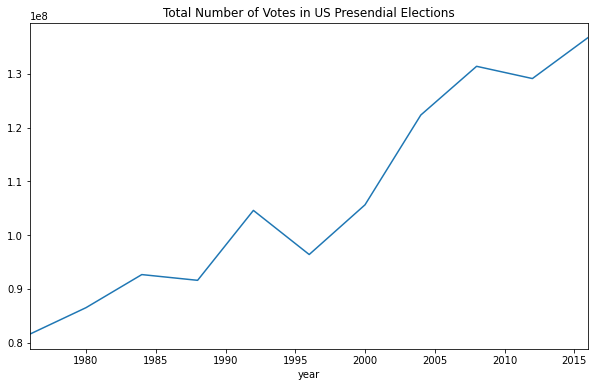

In [8]:
#uset the magic function to display the plot inline
%matplotlib inline
yearly_votes.groupby('year').sum()\
.plot(figsize=(10,6), legend=False,
title='Total Number of Votes in US Presendial Elections')

In [11]:
#the above dataset doesnt contain the winner for each election . we can ge that data from a wikipedia dataset
presidents_dfs = pd.read_html("https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States")

In [13]:
type(presidents_dfs)

list

In [17]:
#Extract  the second dataframe in the list of dataframes
presidents_dfs[1].head()

,Presidency[a],Presidency[a].1,President,President.1,Party[b],Party[b].1,Election,Vice President
0,1,"April 30, 1789–March 4, 1797",NaN,George Washington,NaN,Unaffiliated,1788–89,John Adams[c]
1,1,"April 30, 1789–March 4, 1797",NaN,George Washington,NaN,Unaffiliated,1792,John Adams[c]
2,2,"March 4, 1797–March 4, 1801",NaN,John Adams,NaN,Federalist,1796,Thomas Jefferson[d]
3,3,"March 4, 1801–March 4, 1809",NaN,Thomas Jefferson,NaN,Democratic-Republican,1800,Aaron Burr
4,3,"March 4, 1801–March 4, 1809",NaN,Thomas Jefferson,NaN,Democratic-Republican,1804,George Clinton[e]


In [20]:
winners_df=presidents_dfs[1][['Election','President.1']]
winners_df.head()

,Election,President.1
0,1788–89,George Washington
1,1792,George Washington
2,1796,John Adams
3,1800,Thomas Jefferson
4,1804,Thomas Jefferson


In [28]:
#since we are interested in the data from 1976-2016, we can remove the other rows
# the last row contains invalid data
winners_df.iloc[-12:-1,:]


,Election,President.1
70,1976,Jimmy Carter
71,1980,Ronald Reagan
72,1984,Ronald Reagan
73,1988,George H. W. Bush
74,1992,Bill Clinton
75,1996,Bill Clinton
76,2000,George W. Bush
77,2004,George W. Bush
78,2008,Barack Obama
79,2012,Barack Obama
